In [1]:
from statisticslib.models.ArithmeticBrownianMotion import ArithmeticBrownianMotion
from statisticslib.stats.KolmogorovSmirnovStatistics import KolmogorovSmirnovStatistics
from statisticslib.stats.AndersonDarlingStatistics import AndersonDarlingStatistics
from statisticslib.stats.LikelihoodRatioStatistics import LikelihoodRatioStatistics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
N_obs = 1251
h = 1
d = 1

sigma_one = 1.0
sigma_three = 1.10

In [3]:
model_one = ArithmeticBrownianMotion(sigma_one, N_obs)
model_three = ArithmeticBrownianMotion(sigma_three, N_obs)

<Axes: >

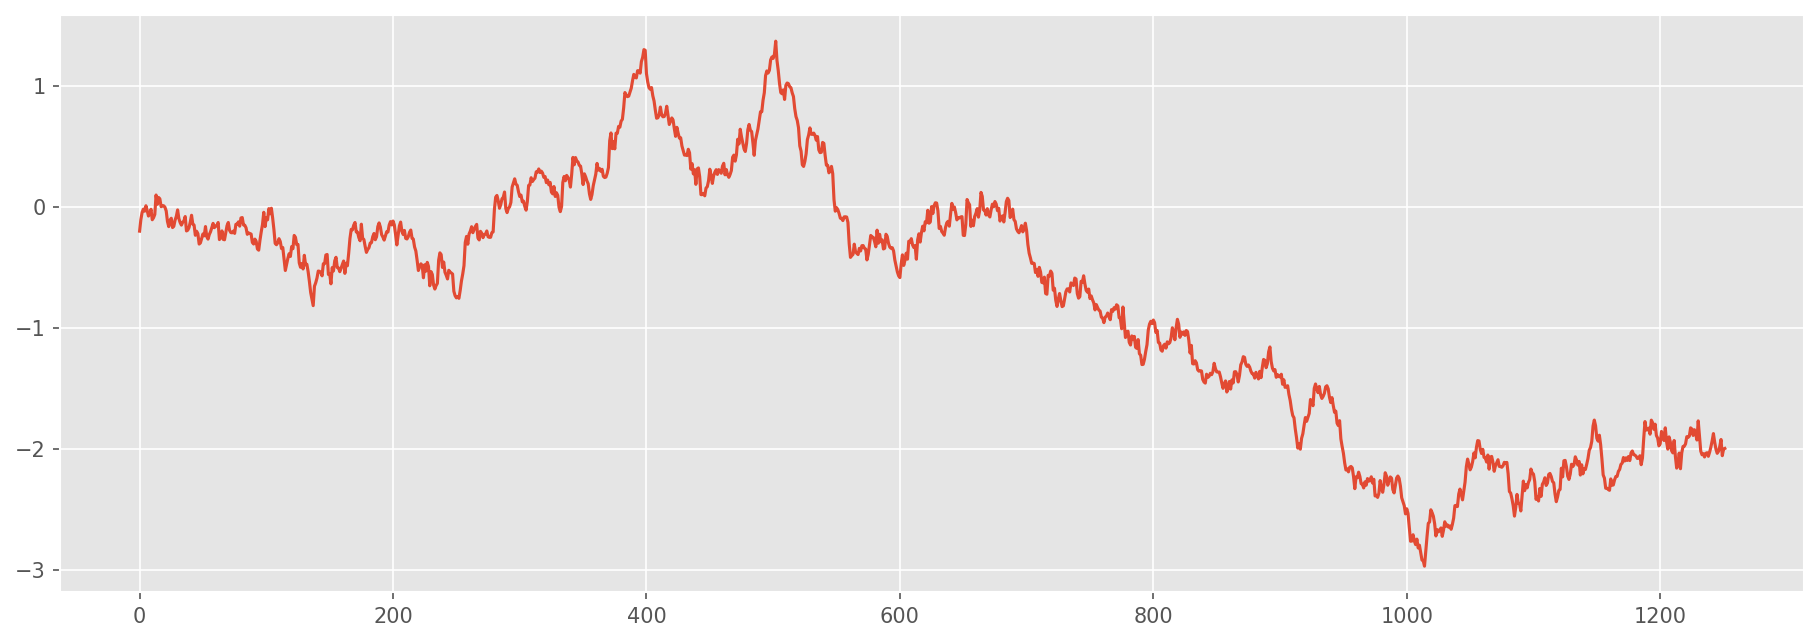

In [4]:
_, ax = plt.subplots(figsize=(15, 5), dpi=150)

model_one.simulateTrajectory(h).plot(ax=ax)

In [5]:
def density_sample_series(data: pd.Series, step_for_range: int = 1):
    """Get hist plot of your sample.

    Args:
        step_for_range (int): amount of bins for hist
    """
    left = int(data.min())
    right = int(data.max()) + 1

    ranges = np.linspace(left, right, step_for_range)

    df_result = data.value_counts(bins=ranges, sort=False, normalize=True)

    df_result.index = ranges[:-1]

    return df_result

<Axes: >

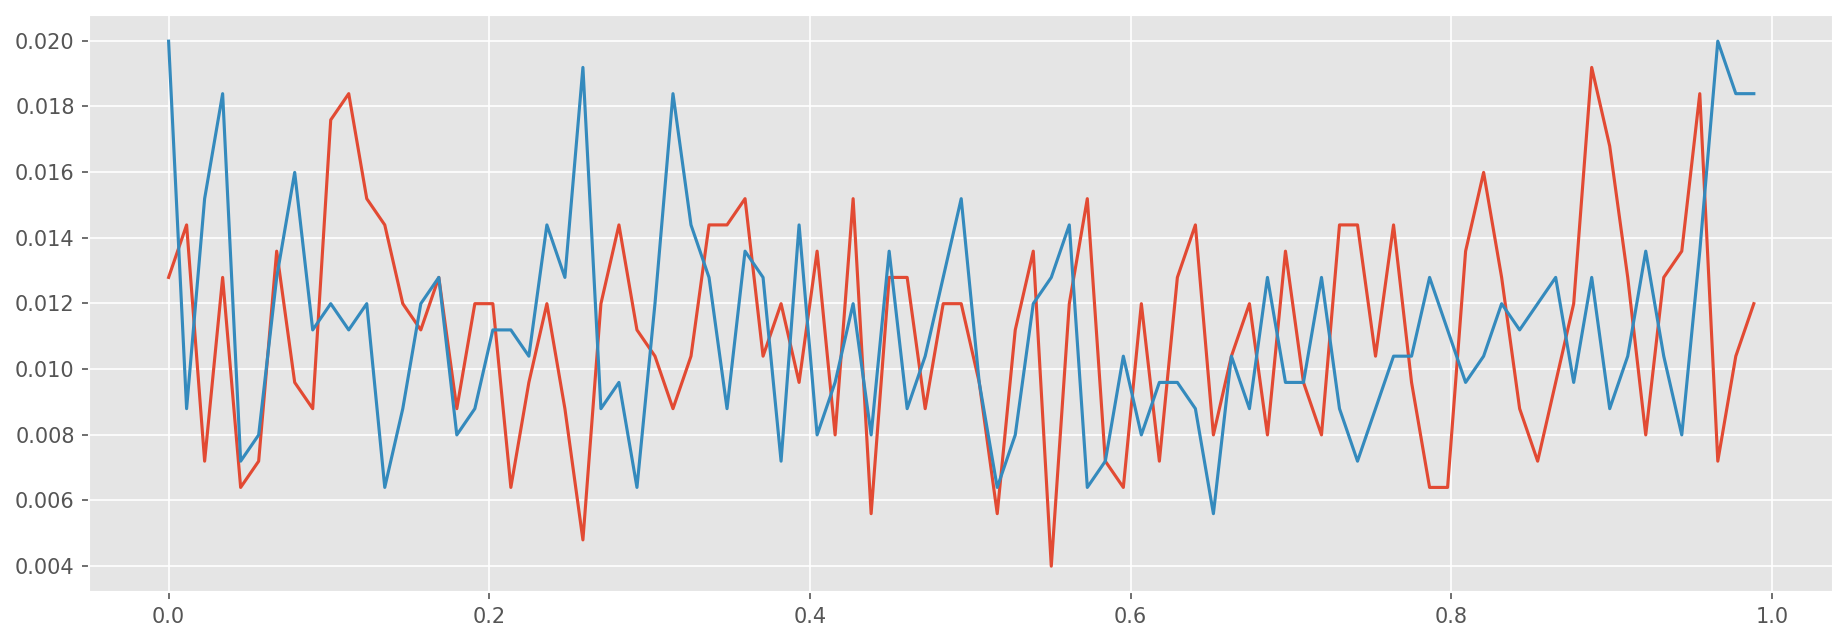

In [6]:
_, ax = plt.subplots(figsize=(15, 5), dpi=150)

density_sample_series(model_one.transformToUniform(model_one.simulateTrajectory(h), h), 90).plot()
density_sample_series(model_one.transformToUniform(model_three.simulateTrajectory(h), h), 90).plot()

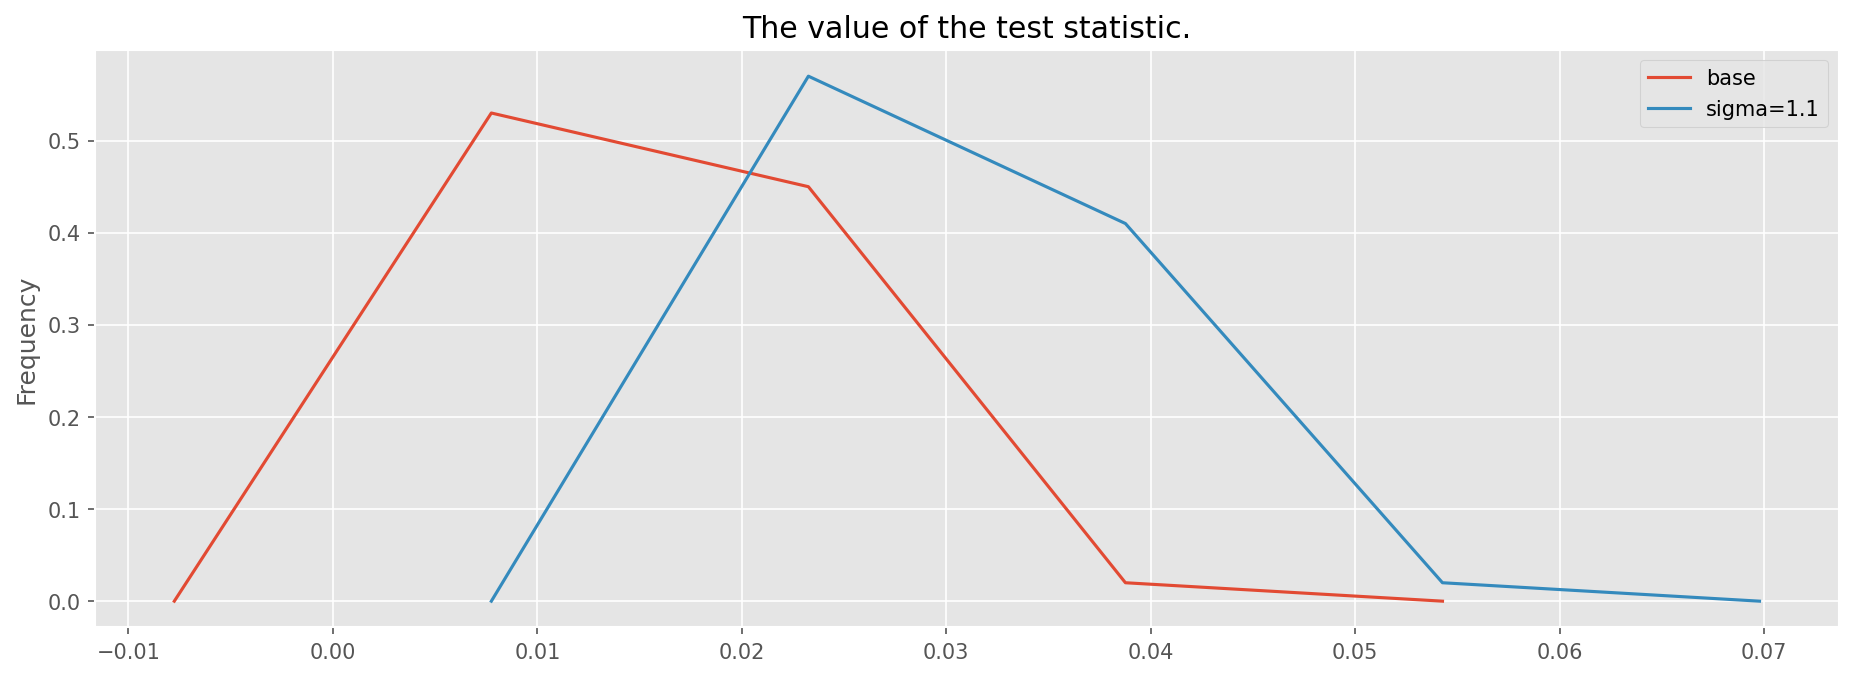

In [7]:
KolmogorovSmirnovStatistics(model_one, d, h).plotDistribution({str(sigma_three) : model_three}, 130)

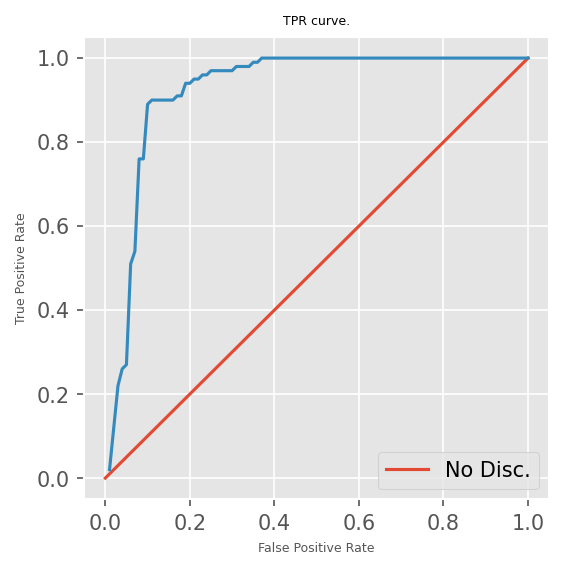

In [8]:
KolmogorovSmirnovStatistics(model_one, d, h).plotDiscriminatoryCurve(model_three)


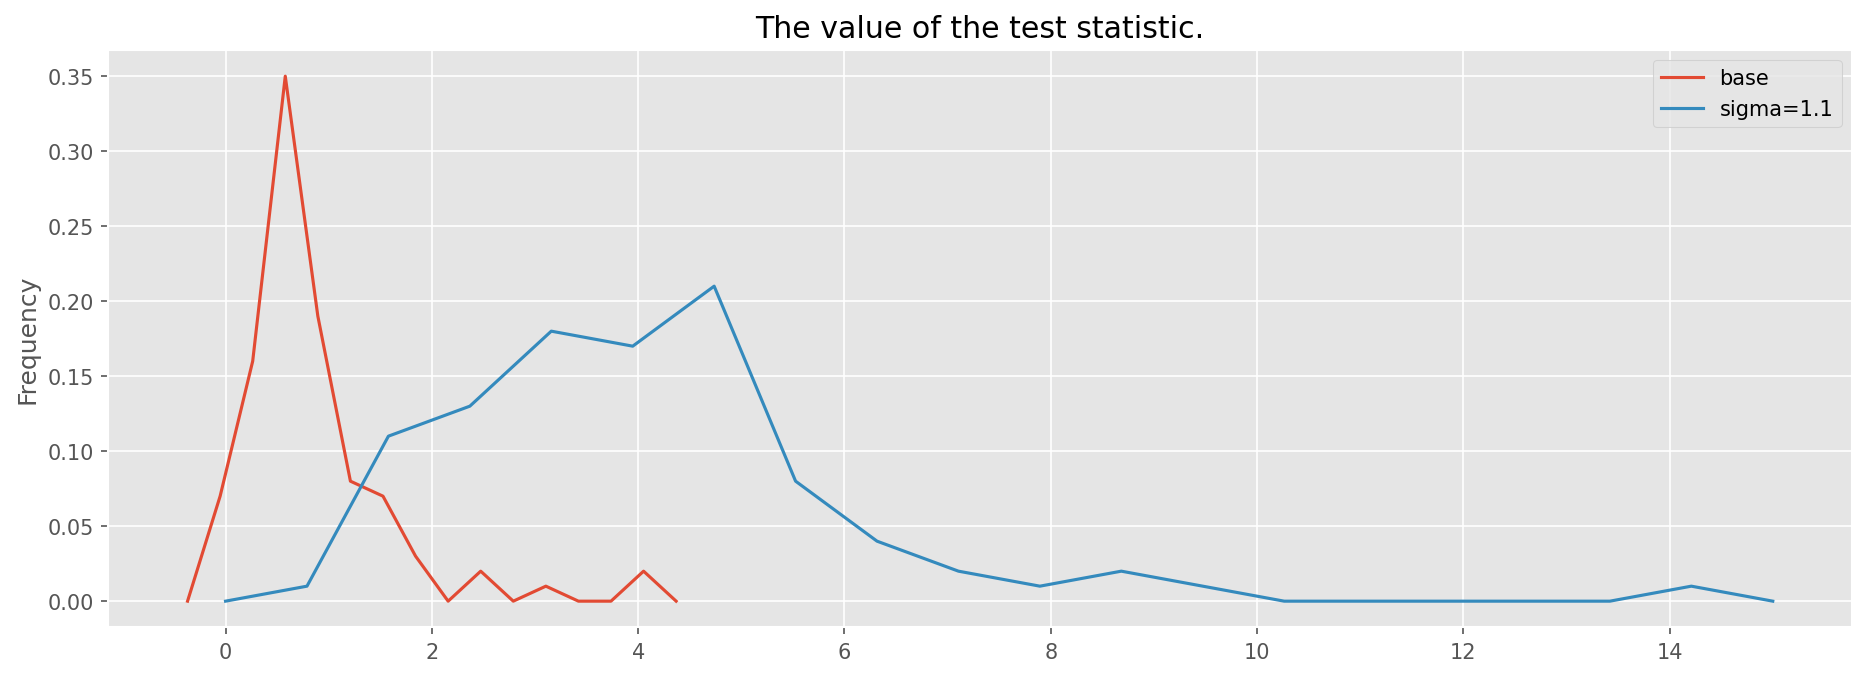

In [9]:
AndersonDarlingStatistics(model_one, d, h).plotDistribution({str(sigma_three) : model_three}, 20)

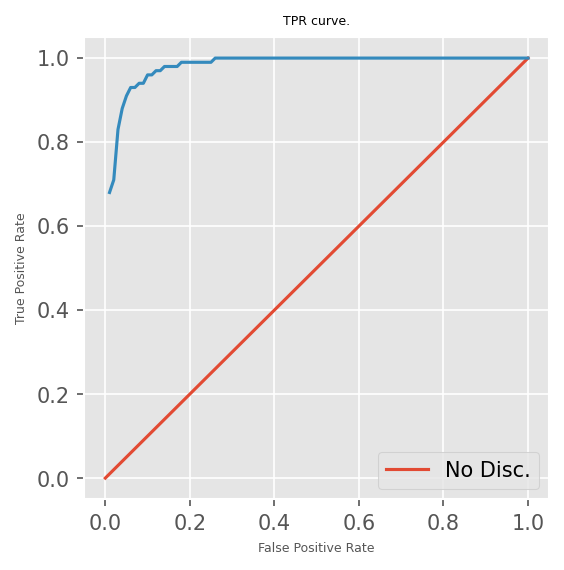

In [10]:
AndersonDarlingStatistics(model_one, d, h).plotDiscriminatoryCurve(model_three)

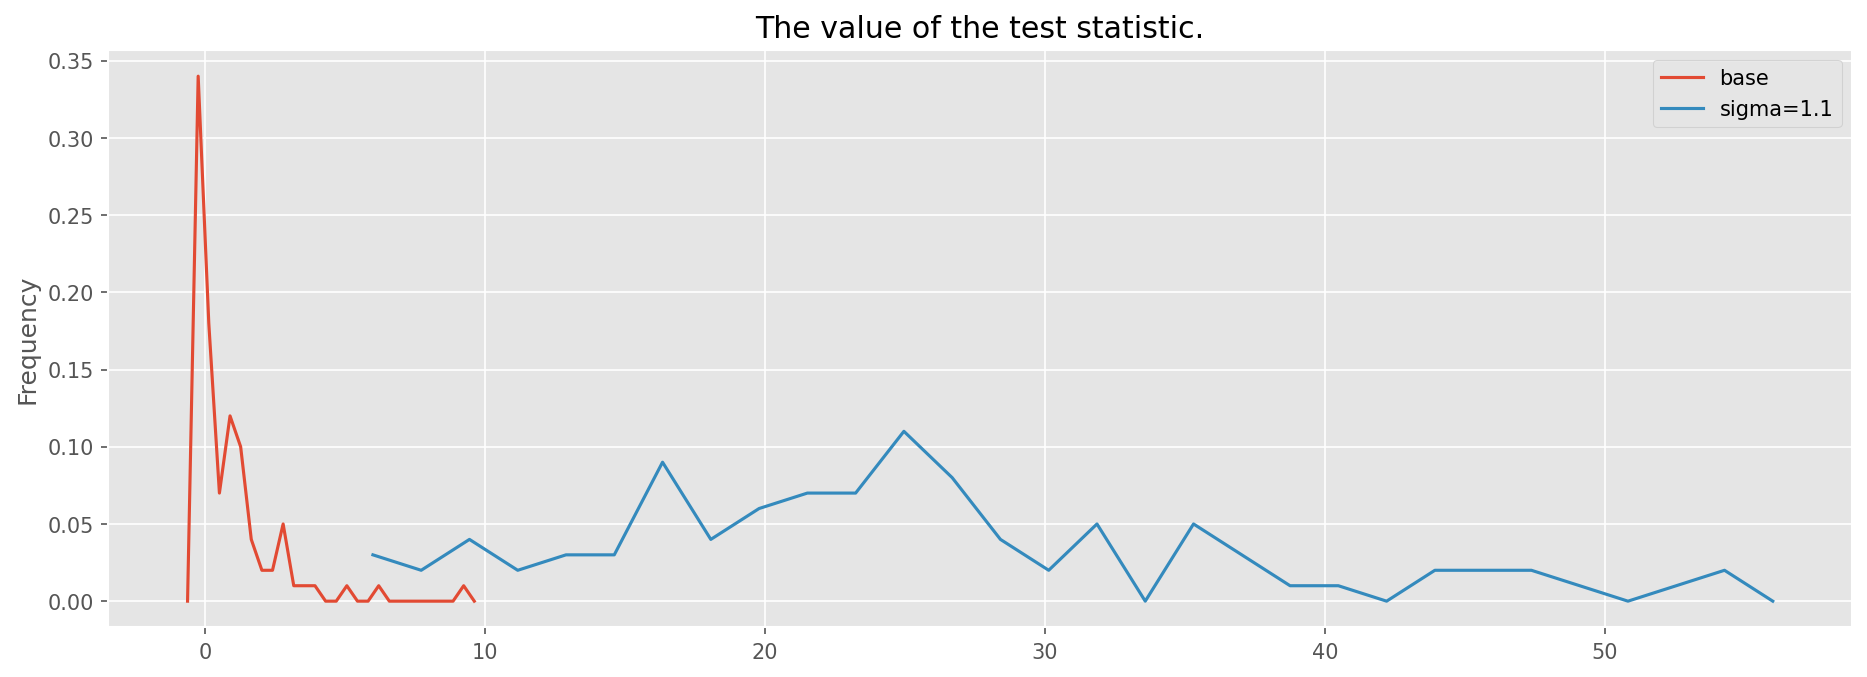

In [11]:
LikelihoodRatioStatistics(model_one, d, h).plotDistribution({str(sigma_three) : model_three}, 30)

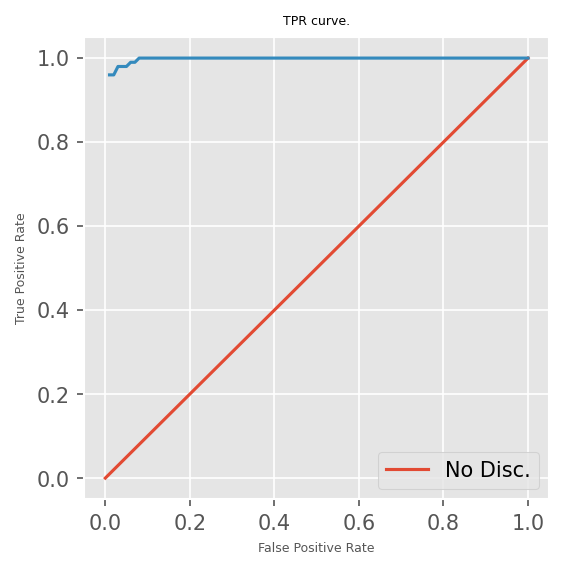

In [12]:
LikelihoodRatioStatistics(model_one, d, h).plotDiscriminatoryCurve(model_three)